In [2]:
source('/home/meisl/Workplace/neuroblastoma/immune/NB.immune.atlas/lib.r')


In [4]:
load('F1.RData')

In [6]:
annot=as.factor(allano)
annot.pal <- setNames(sample(rainbow(length(levels(annot)),v=0.85,s=0.7)),levels(annot));
annot.pal=readRDS('../annot.pal.rds')
#annot.pal['NK2']="#4141D9"
annot.palf <- function(n) return(annot.pal[1:n])


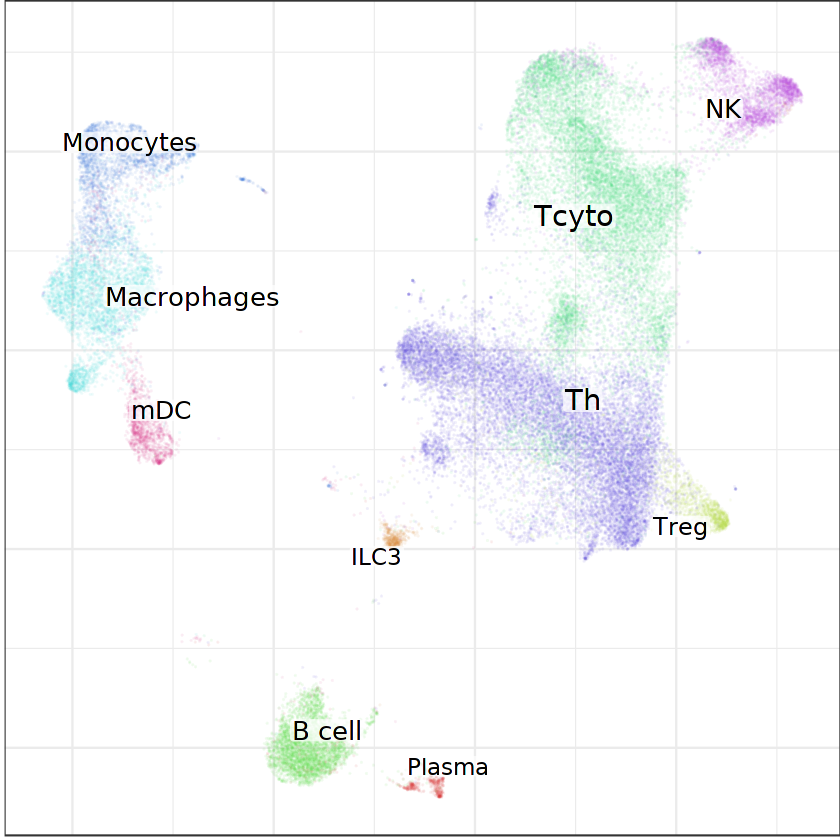

In [7]:
a1 <- con1$plotGraph(alpha=0.05,font.size = c(4.7,6),size=0.1, groups=annot, plot.na=F, mark.groups=T, palette=annot.pal, raster=TRUE)
a1

In [12]:

meta = read.csv('../meta.txt',sep='\t',header=T)

sample.g2 = meta$Risk
names(sample.g2) = meta$Sample


fraction.palette1 = c('grey','yellow','purple','red')
names(fraction.palette1) = c('Adrenal','Low risk','Intermediate risk','High risk')


[1]    18 52960

[1] "blue"
[1] "white"
[1] "red"


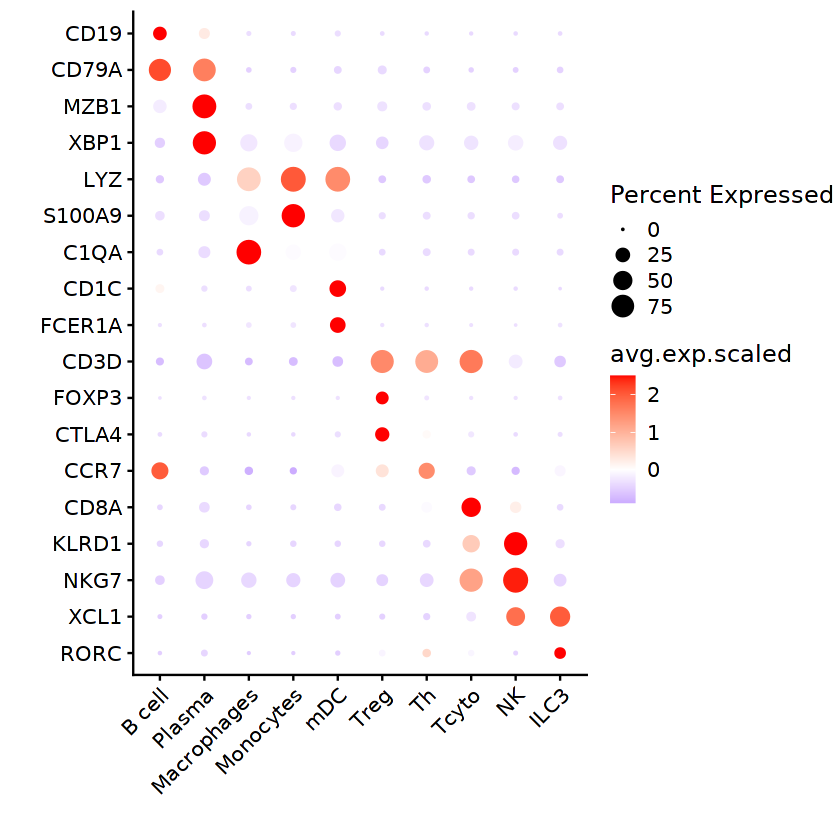

In [15]:
annot = ordered(annot,levels=c(
  "B cell" ,"Plasma"       ,   "Macrophages"     ,   "Monocytes" ,  "mDC" ,   "Treg"   ,  "Th",       "Tcyto"      , "NK"  , "ILC3"
))
genes = c('CD19','CD79A','MZB1','XBP1','LYZ','S100A9','C1QA','CD1C','FCER1A','CD3D','FOXP3','CTLA4','CCR7','CD8A','KLRD1','NKG7',     'XCL1','RORC')

    
exp <- do.call(rbind,lapply(sn(genes),function(gene) conos:::getGeneExpression(con1,gene)))
exp[is.na(exp)]=0
dim(exp)

library(cowplot)
cname=names(annot)
cname = intersect(cname,colnames(exp))
p=Dotfig(genes,exp[,cname],annot[cname],cols = c("blue","white", "red"))+xlab('')+ylab('')
p


Using SampleType as value column: use value.var to override.



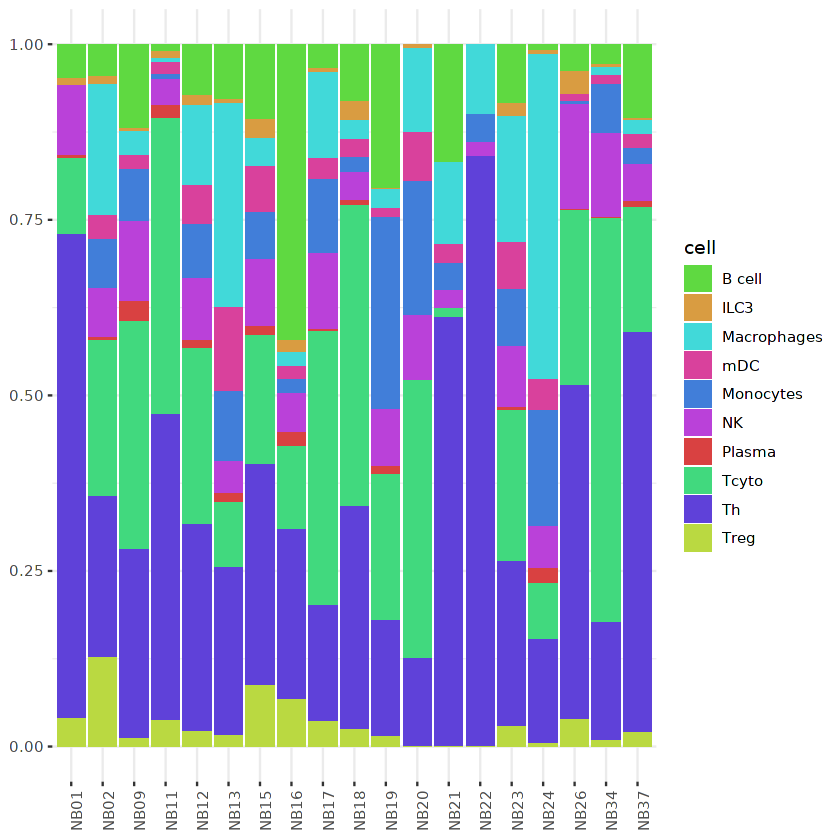

In [19]:
library(reshape2)


ssamp = con1$getDatasetPerCell()
cname = intersect(names(annot2),names(ssamp))
ano2=data.frame('Cell'=annot2[cname],'SampleType'=ssamp[cname])

# Annotation vs sample
tmp2 <- acast(ano2, Cell ~ SampleType, fun.aggregate=length)
tmp3 <- (sweep(tmp2, 2, colSums(tmp2), FUN='/'))
tmp4 <- melt(tmp3)
#head(tmp4)
names(tmp4) <- c('cell', 'sample','pc.of.sample')
#head(tmp4)


p=ggplot(tmp4, aes(x=sample, fill=cell, y = pc.of.sample)) +theme_bw()+
  geom_bar(stat='identity', position='fill') +
  scale_fill_manual(values=annot.pal)+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),
        axis.title.y=element_blank(),panel.border = element_blank(),
        axis.title.x=element_blank(),legend.position = 'right')

p

Using SampleType as value column: use value.var to override.



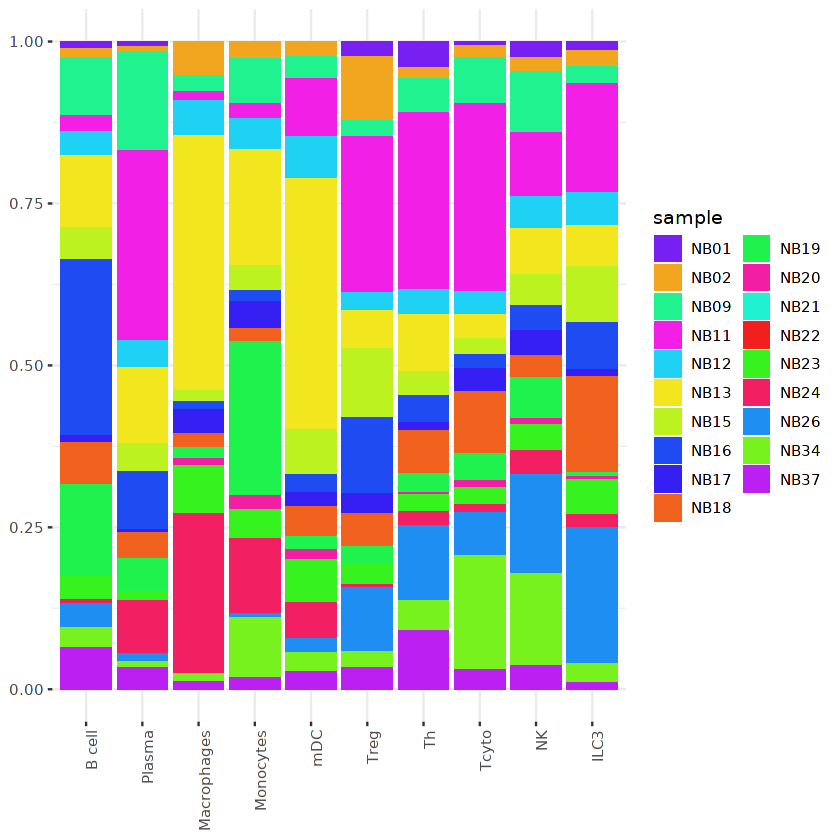

In [21]:
library(reshape2)


ssamp = con1$getDatasetPerCell()
ssamp=as.factor(ssamp)
ssamp.pal <- setNames(sample(rainbow(length(levels(ssamp)),v=0.95,s=0.87)),levels(ssamp));


cname = intersect(names(annot),names(ssamp))
ano2=data.frame('Cell'=ssamp[cname],'SampleType'=annot[cname])

# Annotation vs sample
tmp2 <- acast(ano2, Cell ~ SampleType, fun.aggregate=length)
tmp3 <- (sweep(tmp2, 2, colSums(tmp2), FUN='/'))
tmp4 <- melt(tmp3)
#head(tmp4)
names(tmp4) <- c('sample', 'cell','pc.of.sample')
#head(tmp4)


p=ggplot(tmp4, aes(x=cell, fill=sample, y = pc.of.sample)) +theme_bw()+
  geom_bar(stat='identity', position='fill') +
  scale_fill_manual(values=ssamp.pal)+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),
        axis.title.y=element_blank(),panel.border = element_blank(),
        axis.title.x=element_blank(),legend.position = 'right')+guides(fill=guide_legend(ncol=2))


p

In [22]:
conJ = readRDS('join.all.immune.NB_conos.rds')


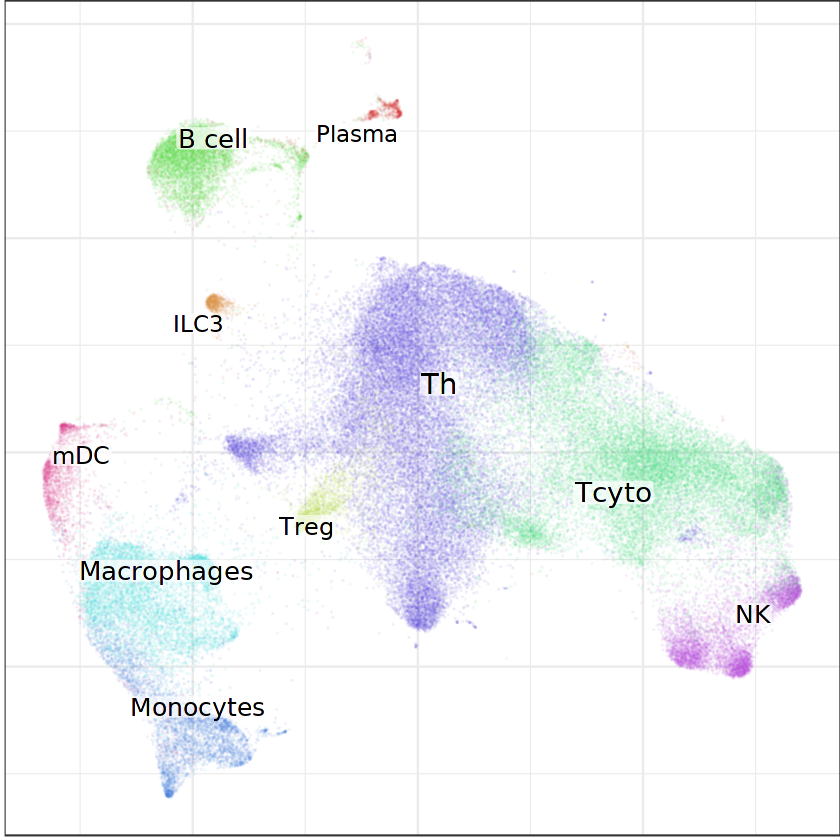

In [25]:
a1 <- conJ$plotGraph(alpha=0.05,font.size = c(4.7,6),size=0.1, groups=, plot.na=F, mark.groups=T, palette=annot.pal, raster=TRUE)
a1

Using SampleType as value column: use value.var to override.



,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,B Lymphocytes,000FQM,0.0000000
2,Myeloid,000FQM,0.0000000
3,NK,000FQM,0.1176471
4,T Lymphocytes,000FQM,0.8823529
5,B Lymphocytes,000GGU,0.2175573
6,Myeloid,000GGU,0.0000000


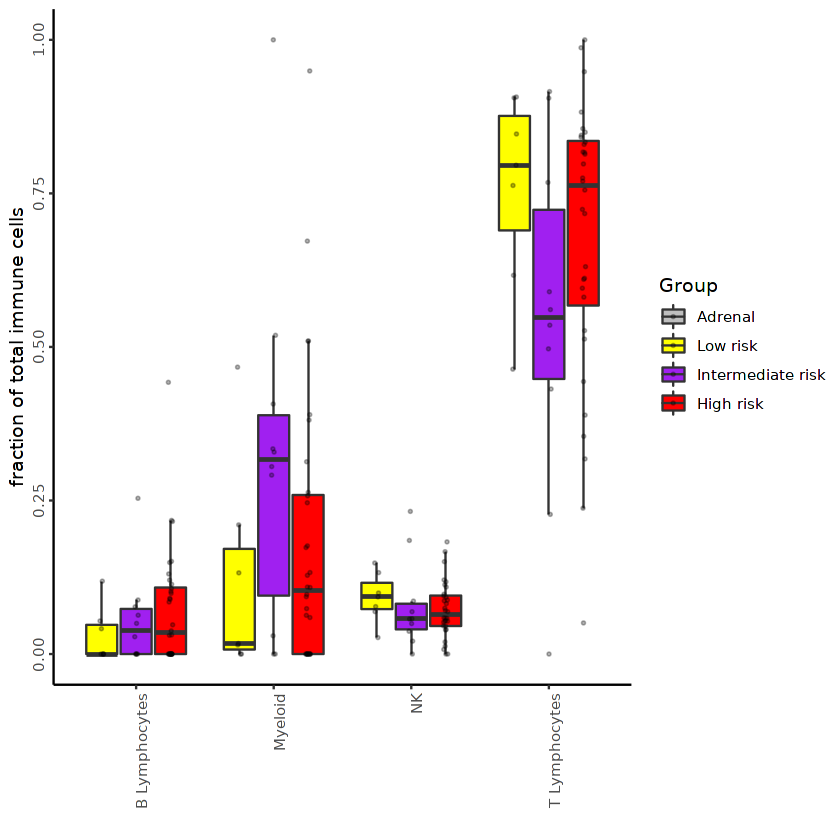

In [24]:
ssamp = conJ$getDatasetPerCell()

annot2 = Toch(annot)
annot2[annot2 %in% c('ILC3','Tcyto','Th','Treg')] = 'T Lymphocytes'
annot2[annot2 %in% c('B cell','Plasma')] = 'B Lymphocytes'
annot2[annot2 %in% c('B cell','Plasma')] = 'B Lymphocytes'
annot2[annot2 %in% c('Macrophages','mDC','Monocytes')] = 'Myeloid'

cn = intersect(names(annot),names(ssamp))
ano2=data.frame('Cell'=annot2[cn],'SampleType'=ssamp[cn])

# Annotation vs sample
tmp2 <- acast(ano2, Cell ~ SampleType, fun.aggregate=length)

tmp3 <- (sweep(tmp2, 2, colSums(tmp2), FUN='/'))
tmp4 <- melt(tmp3)
head(tmp4)

names(tmp4) <- c('cell', 'sample','pc.of.sample')

tmp4$Group=NULL
tmp4$Group=sample.groups2[as.character(tmp4$sample)]


p <- ggplot(na.omit(tmp4),aes(x=cell,y=pc.of.sample,dodge=Group,fill=Group))+geom_boxplot(notch=FALSE,outlier.shape=NA)  +  geom_point(position = position_jitterdodge(jitter.width=0.1),color=adjustcolor(1,alpha=0.3),pch=19,size=0.5)+theme_classic()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1), axis.text.y = element_text(angle = 90, hjust = 0.5))  +xlab("") +ylab("fraction of total immune cells")+theme(legend.position="right")+
  scale_fill_manual(values=fraction.palette1) #+ggpubr::stat_compare_means(label = "p.signif", label.x = 1.5)
p

ggsave('fraction.pdf',p,height=3,width=4.5)



library(ggpubr)

df=tmp4
rsig=NULL
for (i in unique(df[,1])){
  tmp=df[df[,1]==i,]

  sig=compare_means(pc.of.sample ~ Group,  data = tmp) # 
  sig$cell=i
  rsig=rbind(rsig,sig)
  #sig[sig$p.signif!='ns',]
}

write.table(rsig,'fraction.risk.group.pvalue.xls',sep='\t',col.names=T,row.names=F,quote=F)
